In [1]:
# Time Based Learning Rate Decay
from pandas import read_csv
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

import os
os.chdir('C:/deep_learning') # This is where the input dataset is stored
os.getcwd()

Using Theano backend.


'C:\\deep_learning'

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataframe = read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
print(X.shape)
print(Y)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

(351, 34)
['g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 

In [3]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [4]:
# Compile model (No Decay Rate Schedule - Baseline)
epochs = 50
learning_rate = 0.1
decay_rate = 0.0
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.6847 - acc: 0.6298 - val_loss: 0.6540 - val_acc: 0.7414
Epoch 2/50
0s - loss: 0.6420 - acc: 0.7702 - val_loss: 0.5431 - val_acc: 0.9224
Epoch 3/50
0s - loss: 0.5593 - acc: 0.8085 - val_loss: 0.4620 - val_acc: 0.9224
Epoch 4/50
0s - loss: 0.4653 - acc: 0.8340 - val_loss: 0.4340 - val_acc: 0.9138
Epoch 5/50
0s - loss: 0.3798 - acc: 0.8681 - val_loss: 0.2662 - val_acc: 0.9483
Epoch 6/50
0s - loss: 0.3137 - acc: 0.8894 - val_loss: 0.3781 - val_acc: 0.8793
Epoch 7/50
0s - loss: 0.2651 - acc: 0.9106 - val_loss: 0.2141 - val_acc: 0.9483
Epoch 8/50
0s - loss: 0.2320 - acc: 0.9277 - val_loss: 0.1345 - val_acc: 0.9741
Epoch 9/50
0s - loss: 0.2339 - acc: 0.9149 - val_loss: 0.1952 - val_acc: 0.9569
Epoch 10/50
0s - loss: 0.1868 - acc: 0.9362 - val_loss: 0.2581 - val_acc: 0.9138
Epoch 11/50
0s - loss: 0.1797 - acc: 0.9404 - val_loss: 0.1942 - val_acc: 0.9483
Epoch 12/50
0s - loss: 0.1598 - acc: 0.9489 - val_loss: 0.1013 - val_acc

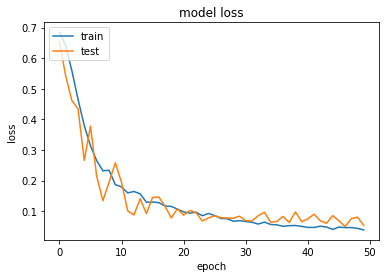

In [5]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.0396 - acc: 0.9957 - val_loss: 0.0884 - val_acc: 0.9828
Epoch 2/50
0s - loss: 0.0393 - acc: 0.9872 - val_loss: 0.0540 - val_acc: 0.9914
Epoch 3/50
0s - loss: 0.0449 - acc: 0.9915 - val_loss: 0.0511 - val_acc: 0.9914
Epoch 4/50
0s - loss: 0.0390 - acc: 0.9915 - val_loss: 0.0656 - val_acc: 0.9914
Epoch 5/50
0s - loss: 0.0343 - acc: 0.9957 - val_loss: 0.0706 - val_acc: 0.9914
Epoch 6/50
0s - loss: 0.0327 - acc: 0.9957 - val_loss: 0.0670 - val_acc: 0.9914
Epoch 7/50
0s - loss: 0.0330 - acc: 0.9915 - val_loss: 0.0678 - val_acc: 0.9914
Epoch 8/50
0s - loss: 0.0311 - acc: 0.9957 - val_loss: 0.0688 - val_acc: 0.9914
Epoch 9/50
0s - loss: 0.0312 - acc: 0.9957 - val_loss: 0.0641 - val_acc: 0.9914
Epoch 10/50
0s - loss: 0.0311 - acc: 0.9957 - val_loss: 0.0611 - val_acc: 0.9914
Epoch 11/50
0s - loss: 0.0304 - acc: 0.9915 - val_loss: 0.0725 - val_acc: 0.9914
Epoch 12/50
0s - loss: 0.0299 - acc: 0.9957 - val_loss: 0.0651 - val_acc

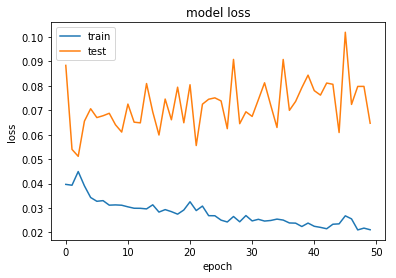

In [6]:
# Fit the model
history2 = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()